# ADABOOST CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Avoid unnecessary warnings, (EX: software updates, version mismatch, and so on.)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('CYBER.csv')

In [4]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force


In [5]:
del df["'TotLen Fwd Pkts'"]
del df["'TotLen Bwd Pkts'"]
del df["'Fwd Pkt Len Max'"]
del df["'Fwd Pkt Len Min'"]
del df["'Fwd Pkt Len Mean'"]
del df["'Fwd Pkt Len Std'"]
del df["'Bwd Pkt Len Max'"]
del df["'Bwd Pkt Len Mean'"]
del df["'Idle Std'"]
del df["'Flow Byts/s'"]
del df["'Flow IAT Std'"]
del df["'Flow IAT Min'"]
del df["'Pkt Len Max'"]
del df["'Bwd Pkt Len Min'"]
del df["'Flow IAT Max'"]
del df["'Fwd IAT Max'"]
del df["'Fwd IAT Min'"]
del df["'Bwd IAT Std'"]
del df["'Bwd IAT Max'"]
del df["'Fwd IAT Std'"]
del df["'Bwd IAT Min'"]
del df["'Bwd PSH Flags'"]
del df["'Bwd URG Flags'"]
del df["'Pkt Len Min'"]
del df["'Pkt Len Std'"]
del df["'Pkt Len Var'"]
del df["'FIN Flag Cnt'"]
del df["'RST Flag Cnt'"]
del df["'PSH Flag Cnt'"]
del df["'ACK Flag Cnt'"]
del df["'URG Flag Cnt'"]
del df["'CWE Flag Count'"]

In [6]:
df=df.dropna()

In [7]:
df.columns

Index([''Flow Duration'', ''Tot Fwd Pkts'', ''Tot Bwd Pkts'',
       ''Bwd Pkt Len Std'', ''Flow Pkts/s'', ''Flow IAT Mean'',
       ''Fwd IAT Tot'', ''Fwd IAT Mean'', ''Bwd IAT Tot'', ''Bwd IAT Mean'',
       ''Fwd Header Len'', ''Bwd Header Len'', ''Fwd Pkts/s'', ''Bwd Pkts/s'',
       ''Pkt Len Mean'', ''SYN Flag Cnt'', ''ECE Flag Cnt'', ''Down/Up Ratio'',
       ''Pkt Size Avg'', ''Fwd Seg Size Avg'', ''Bwd Seg Size Avg'',
       ''Subflow Fwd Pkts'', ''Subflow Fwd Byts'', ''Subflow Bwd Pkts'',
       ''Subflow Bwd Byts'', ''Init Bwd Win Byts'', ''Fwd Act Data Pkts'',
       ''Active Mean'', ''Active Std'', ''Active Max'', ''Active Min'',
       ''Idle Mean'', ''Idle Max'', ''Idle Min'', 'Label'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Label']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','Bwd Pkt Len Std','Flow Pkts/s','Flow IAT Mean','Fwd IAT Tot','Fwd IAT Mean','Bwd IAT Tot','Bwd IAT Mean',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Max','Idle Min',Label
0,1518,2,5,168.5995,4611.3307,253.0000,487,487.0000,1518,379.5,...,46,1,0,0,0,0,0,0,0,0
1,5894,4,8,744.4771,2035.9688,535.8182,5583,1861.0000,5894,842.0,...,54,1,0,0,0,0,0,0,0,0
2,272,1,1,0.0000,7352.9412,272.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,0
3,2611,4,8,750.2544,4595.9403,237.3636,2351,783.6667,2611,373.0,...,54,1,0,0,0,0,0,0,0,0
4,294,1,1,0.0000,6802.7211,294.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,0


In [10]:
df=df.drop_duplicates()

In [11]:
# Split the datasets into dependent and independent variable
# X is independent variable (Input features)
x1 = df.drop(labels='Label', axis=1)

# Y is dependent variable (Target variable)
y1 = df.loc[:,'Label']

In [12]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 61995, 3: 26204, 4: 3292, 1: 441, 2: 45, 5: 28})
OVER SAMPLING DATA COUNT  :  Counter({0: 61995, 1: 61995, 2: 61995, 3: 61995, 4: 61995, 5: 61995})


In [13]:
# Splitting the dataset into trainng and testing variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  297576
NUMBER OF TEST DATASET      :  74394
TOTAL NUMBER OF DATASET    :  371970


In [14]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  297576
NUMBER OF TEST DATASET      :  74394
TOTAL NUMBER OF DATASET    :  371970


In [15]:
# Implement Adaboost classifier algorithm learning patterns
from sklearn.ensemble import AdaBoostClassifier

In [16]:
ABC = AdaBoostClassifier()
# Fit is the training function for this algorithm.
ABC.fit(x_train,y_train)

AdaBoostClassifier()

In [17]:
# Predict is the test function for this algorithm
predicted = ABC.predict(x_test)

In [18]:
# Check classification report for this algorithm
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF ADABOOST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF ADABOOST CLASSIFIER:

               precision    recall  f1-score   support

           0       0.87      0.05      0.09     12399
           1       0.00      0.00      0.00     12399
           2       0.37      0.13      0.19     12399
           3       0.32      0.82      0.46     12399
           4       0.37      0.97      0.53     12399
           5       0.66      0.28      0.40     12399

    accuracy                           0.38     74394
   macro avg       0.43      0.38      0.28     74394
weighted avg       0.43      0.38      0.28     74394



In [19]:
# Printing the confusion matrix for this algorithms.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


 [[  618     0     1     3 11657   120]
 [   28     0   360  8606  3405     0]
 [    0     0  1637  9680     0  1082]
 [   58     0   139 10155  1529   518]
 [    4     0   106   181 12017    91]
 [    0     0  2189  2720  3989  3501]]


In [20]:
# Computing the cross value score of this algorithm.
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ABC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [39.52469285 29.71879453 28.062747   56.86345673 39.43328763]


In [21]:
# Printing the accuracy score of this algorithm.
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS : 37.540661881334515


In [22]:
# Checking the hamming loss of this algorithm.
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ADABOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF ADABOOST CLASSIFIER IS : 62.459338118665485


THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


[[  618     0     1     3 11657   120]
 [   28     0   360  8606  3405     0]
 [    0     0  1637  9680     0  1082]
 [   58     0   139 10155  1529   518]
 [    4     0   106   181 12017    91]
 [    0     0  2189  2720  3989  3501]]


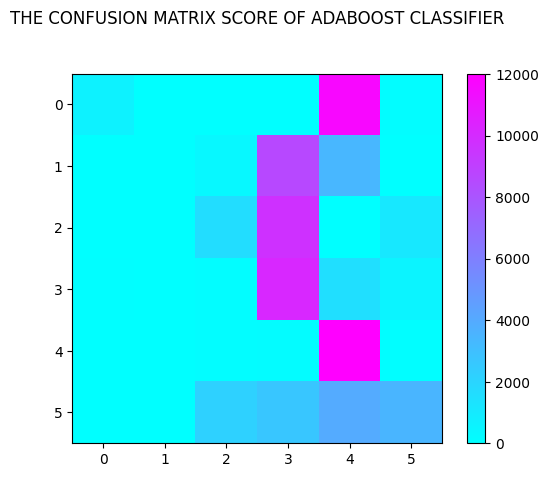

In [23]:
# Plot a Confusion matrix for this algorithm.
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

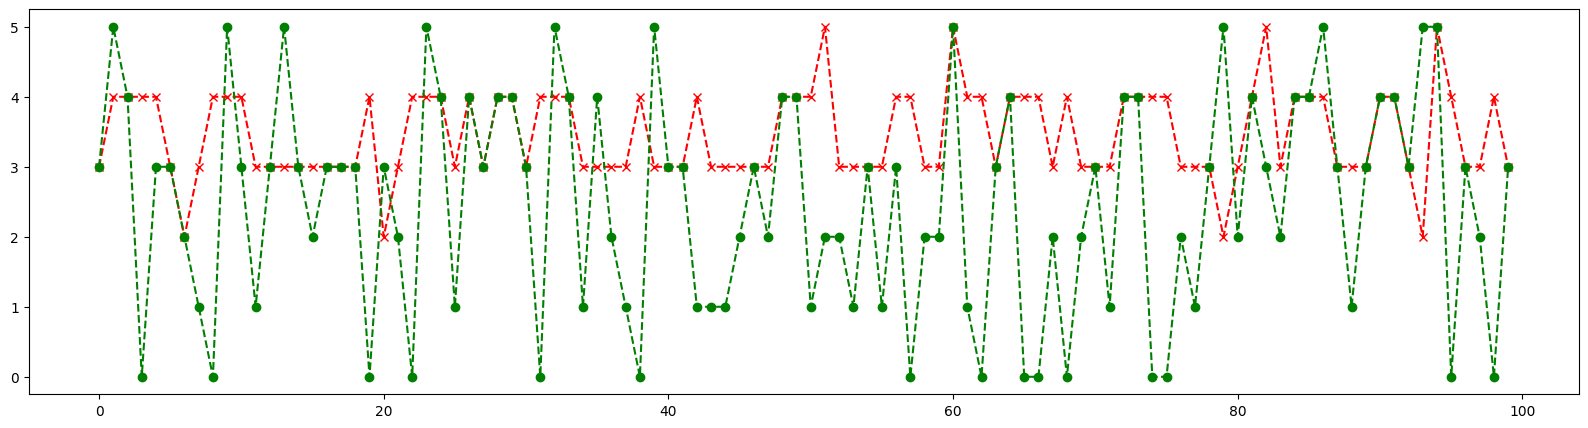

In [24]:
# Plotting the worm plot for this model.
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()